# STAT 2336: Lecture 02-04-2026


<!--NAVIGATION-->
<[Lecture 4](Lecture-4.ipynb)| [Contents](Index.ipynb) | [Lecture 6](Lecture-6.ipynb)>

## Timing and profiling

>*"We should forget about small efficiencies, say about 97% of the time: premature optimization is the root of all evil"*
><br> Donald Knuth, Computing Surveys, Vol. 6, No. 4, December 1974

Stuff for code timing:

Default Jupyter magic commands:

- ``%time``: Time the execution of a single statement
- ``%timeit``: Time repeated execution of a single statement for more accuracy

Further magic commands are available by installing the modules  ``line_profiler``
and ``memory profiler``.

- ``%prun``: Run code with the profiler
- ``%lprun``: Run code with the line-by-line profiler
- ``%memit``: Measure the memory use of a single statement
- ``%mprun``: Run code with the line-by-line memory profiler


In [84]:
%timeit sum(range(100))

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
278 ns ± 5.34 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [86]:
%%timeit 
total = 0
for i in range(100):
    for j in range(i):
        total += i * j

95 μs ± 1.17 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [87]:
import random
L = [random.random() for i in range(100000)]
%timeit L.sort()

186 μs ± 5.35 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [8]:
import random
L = [random.random() for i in range(1000000)]

%time L.sort()
print('Now L is already sorted')
%time L.sort()


CPU times: user 118 ms, sys: 4.81 ms, total: 123 ms
Wall time: 124 ms
Now L is already sorted
CPU times: user 10.7 ms, sys: 68 μs, total: 10.7 ms
Wall time: 10.8 ms


In [90]:
def fiblist(n):
    L = []
    a, b = 0,1
    while len(L) < n:
        a, b = b, a + b
        L.append(a)
    return L

In [92]:
print(fiblist(10))


[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


In [95]:
#%prun: Run code with the profiler
%prun fiblist(100000)

         200452 function calls (200445 primitive calls) in 0.306 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.132    0.132    0.136    0.136 2546041411.py:1(fiblist)
       13    0.080    0.006    0.086    0.007 socket.py:621(send)
        1    0.063    0.063    0.199    0.199 <string>:1(<module>)
   100000    0.007    0.000    0.007    0.000 {method 'append' of 'list' objects}
        2    0.005    0.003    0.006    0.003 {method 'recv' of '_socket.socket' objects}
      2/1    0.005    0.003    0.000    0.000 {method 'control' of 'select.kqueue' objects}
        1    0.005    0.005    0.006    0.006 socket.py:777(recv_multipart)
   100013    0.004    0.000    0.004    0.000 {built-in method builtins.len}
        1    0.001    0.001    0.007    0.007 selector_events.py:129(_read_from_self)
       14    0.000    0.000    0.001    0.000 enum.py:1545(__or__)
        3    0.000    0.000    0.001    0.000 zmqs

<div class="alert alert-block alert-info">
Before executing this cell install the ``line_profiler`` in your conda environment
</div>

In [97]:
%load_ext line_profiler

ModuleNotFoundError: No module named 'line_profiler'

In [99]:
#%lprun: Run code with the line-by-line profiler
%lprun -f fiblist fiblist(100000)

UsageError: Line magic function `%lprun` not found.


In [101]:
def fibgen(n):
    a,b = 0,1
    for c in range(n):
        a, b = b, a + b
        yield a
        

In [103]:
%lprun -f fibgen list(fibgen(100000))

UsageError: Line magic function `%lprun` not found.


## Dataset and Statistics

* **Dataset**: collection of data with certain attributes or variables
* **Statistics**: branch of mathematics dealing with the collection, analysis, interpretation, presentation, and organization of data. 


## Variables

A variable is any characteristics, number, or quantity that can be measured or counted. A variable may also be called a data item. 

**Examples** Age, sex, business income and expenses, country of birth, capital expenditure, class grades, eye colour and vehicle type are examples of variables. 

It is called a variable because the value may vary between data units in a population, and may change in value over time. 

### Types of Variables

#### Categorical Variables
Also known as discrete or qualitative variables

>**Nominal variables ** are unordered categorical variables (i.e., not consisting of numerical values) mutually exclusive <br> _Examples_: person's gender, ethnicity, etc.
 
>>**Dichotomous variables ** are nominal variables which have only two categories or levels.

>**Ordinal  variables ** have two or more categories as nominal variables and the categories can also be ordered or ranked. No implication of equal distance between the different points of the scale <br>
_Examples_: [Likert scale](https://en.wikipedia.org/wiki/Likert_scale), educational level, clothing size


#### Numeric Variables

Numeric variables have values that describe a measurable quantity as a number. Numeric variables can assume **continuos** or **discrete** values. 

> **Interval variables **are variables for which  the difference between two values is meaningful and there are equal differences between successive points on the scale but the position of the zero is arbitrary.<br>
_Examples_: temperatures expressed in F or in C. The difference between a temperature of 100 degrees and 90 degrees is the same difference as between 90 degrees and 80 degrees.

>**Ratio variables ** have all the properties of an interval variable, and also have a clear definition of 0.0. (that 0 (zero) of the measurement indicates that there is none of that variable)<br>
_Examples_: Absolute measure of temperature (Kelvin scale), Age, Weight




## Descriptive (summary) statistics

* **Descriptive (summary) statistics**: statistics that quantitatively describe or summarize features of a collection of information.

### Goal

Describe a dataset with a small number of statistics or figures

> ## Intermezzo: get a zip file from the web



In [24]:
import urllib.request
import zipfile 
import io
import csv

In [26]:
url = 'http://nrvis.com/download/data/ca/ca-netscience.zip'

urllib.request.urlretrieve(url, 'dataset1.zip')

('dataset1.zip', <http.client.HTTPMessage at 0x16191f110>)

In [28]:
datazipfile = zipfile.ZipFile('dataset1.zip')
datazipfile.namelist()

['ca-netscience.mtx', 'readme.html']

In [30]:
# Zip file is open in read mode (binary)
datafile = datazipfile.open(datazipfile.namelist()[0],\
                            mode='r')

#TextIO transform binary data in chars
datafile = io.TextIOWrapper(datafile)

print(datafile)

<_io.TextIOWrapper name='ca-netscience.mtx' encoding='UTF-8'>


In [32]:
csvreader = csv.reader(datafile, delimiter=' ')

for row in csvreader:
    print (row)

['%MatrixMarket', 'matrix', 'coordinate', 'pattern', 'symmetric', '']
['%', '379', '379', '914']
['2', '1']
['3', '1']
['4', '1']
['5', '1']
['16', '1']
['44', '1']
['113', '1']
['131', '1']
['250', '1']
['259', '1']
['3', '2']
['5', '4']
['13', '4']
['14', '4']
['15', '4']
['16', '4']
['44', '4']
['45', '4']
['46', '4']
['47', '4']
['61', '4']
['126', '4']
['127', '4']
['128', '4']
['146', '4']
['152', '4']
['153', '4']
['154', '4']
['164', '4']
['165', '4']
['166', '4']
['176', '4']
['177', '4']
['249', '4']
['250', '4']
['274', '4']
['313', '4']
['314', '4']
['323', '4']
['324', '4']
['330', '4']
['371', '4']
['373', '4']
['374', '4']
['15', '5']
['16', '5']
['44', '5']
['45', '5']
['46', '5']
['47', '5']
['176', '5']
['177', '5']
['199', '5']
['201', '5']
['202', '5']
['204', '5']
['231', '5']
['235', '5']
['236', '5']
['237', '5']
['238', '5']
['249', '5']
['250', '5']
['254', '5']
['298', '5']
['313', '5']
['314', '5']
['373', '5']
['374', '5']
['7', '6']
['8', '6']
['8', '7']
['

In [34]:
nfriends = {}

for row in csvreader:
    if row[0].isnumeric():
        nfriends[int(row[0])] = \
        nfriends.get(int(row[0]),0) + 1
        nfriends[int(row[1])] = \
        nfriends.get(int(row[1]),0) + 1

datafile.close()

Now we put all the above code in a function to retrieve 
data from the Network repository

In [36]:
def getNetworkDataset (url='http://nrvis.com/download/data/ca/ca-netscience.zip'):

    urllib.request.urlretrieve(url, 'dataset1.zip')
    datazipfile = zipfile.ZipFile('dataset1.zip')
    datafile = datazipfile.open(datazipfile.namelist()[0], mode='r')
    datafile = io.TextIOWrapper(datafile)

    csvreader = csv.reader(datafile, delimiter=' ')

    nfriends = {}

    for row in csvreader:
        if row[0].isnumeric():
            nfriends[int(row[0])] = nfriends.get(int(row[0]),0) + 1
            nfriends[int(row[1])] = nfriends.get(int(row[1]),0) + 1

    datafile.close()
    
    return nfriends


In [38]:
nfriends = getNetworkDataset()

nfriends

{2: 2,
 1: 10,
 3: 2,
 4: 34,
 5: 27,
 16: 21,
 44: 4,
 113: 15,
 131: 12,
 250: 6,
 259: 3,
 13: 9,
 14: 4,
 15: 16,
 45: 10,
 46: 8,
 47: 8,
 61: 4,
 126: 6,
 127: 6,
 128: 8,
 146: 3,
 152: 1,
 153: 3,
 154: 3,
 164: 4,
 165: 4,
 166: 4,
 176: 8,
 177: 8,
 249: 3,
 274: 2,
 313: 5,
 314: 5,
 323: 4,
 324: 4,
 330: 4,
 371: 2,
 373: 4,
 374: 3,
 199: 7,
 201: 14,
 202: 7,
 204: 6,
 231: 14,
 235: 2,
 236: 10,
 237: 4,
 238: 4,
 254: 2,
 298: 4,
 7: 6,
 6: 2,
 8: 12,
 190: 4,
 191: 2,
 192: 3,
 193: 3,
 26: 27,
 62: 4,
 63: 3,
 64: 3,
 65: 10,
 137: 4,
 189: 3,
 342: 3,
 343: 3,
 344: 1,
 10: 6,
 9: 3,
 11: 3,
 12: 3,
 67: 19,
 68: 5,
 69: 9,
 17: 9,
 18: 8,
 19: 3,
 20: 2,
 278: 2,
 279: 2,
 334: 8,
 366: 4,
 367: 4,
 368: 4,
 29: 1,
 58: 4,
 172: 6,
 258: 5,
 261: 2,
 365: 2,
 208: 1,
 22: 3,
 21: 12,
 23: 11,
 24: 10,
 33: 11,
 109: 2,
 220: 5,
 221: 3,
 232: 5,
 233: 5,
 268: 4,
 287: 2,
 288: 2,
 50: 4,
 51: 15,
 52: 14,
 54: 2,
 55: 2,
 227: 2,
 228: 2,
 79: 3,
 140: 6,
 229: 2,

In describing a single data set we are interested in:

- Size of the data set
- Largest value in the data set
- Smallest value in the data set
- Sum of the values
- Mean (or average)

These figures have a primary role in the **data validation** process. Let's try to use these figures to check that our data importation was successful

### Data set size

In [40]:
print(len(nfriends))

379


### Largest value in the data set

In [42]:
print(max(nfriends.values()))

34


### Smallest value in the data set

In [44]:
print(min(nfriends.values()))

1


### Values sum

In [46]:
print(sum(nfriends.values()) // 2)

914


## Numpy module


In [48]:
import numpy as np

fr = np.array(list(nfriends.values()))


fr.dtype

dtype('int64')

## Histograms

>One of the best ways to summarize a variable is to report the values that appear in the dataset and how many times each value appears. This description is called the distribution of the variable.<br>
>The most common representation of a distribution is a histogram, which is a graph that shows the frequency of each value. 
<br>

**Frequency**  number of times the value appears.

Counter({2: 74, 3: 72, 4: 62, 6: 36, 5: 33, 1: 27, 7: 20, 8: 12, 9: 9, 12: 8, 10: 6, 11: 5, 14: 4, 15: 3, 27: 2, 34: 1, 21: 1, 16: 1, 19: 1, 17: 1, 18: 1})


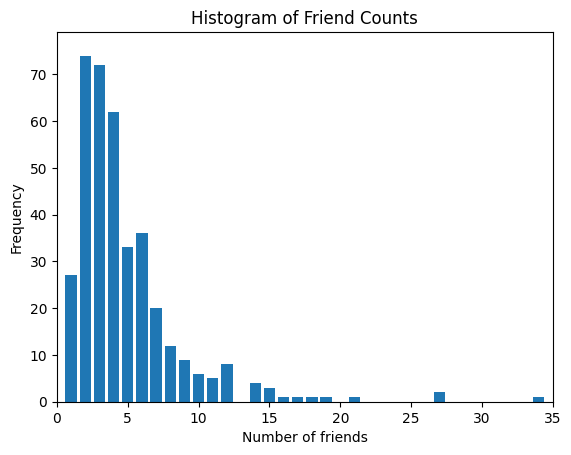

In [50]:
import matplotlib.pyplot as plt

%matplotlib inline



from collections import Counter


friend_counts = Counter(nfriends.values())

print(friend_counts)

xs = range(max(nfriends.values()) + 1)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, max(nfriends.values()) + 1, 0, max(friend_counts.values()) + 5])
plt.title("Histogram of Friend Counts")
plt.xlabel("Number of friends")
plt.ylabel("Frequency")
plt.show()

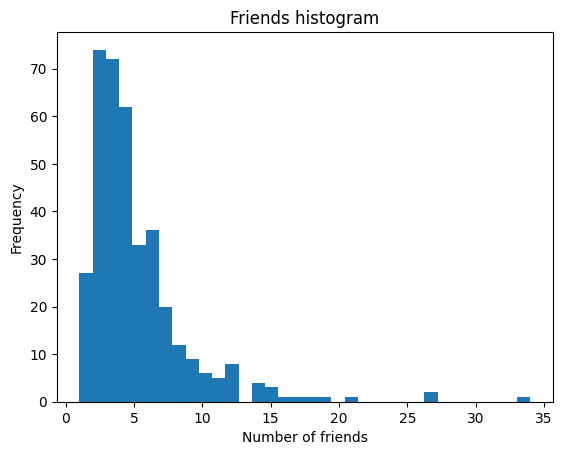

In [54]:
plt.hist(list(nfriends.values()),34) 
plt.title('Friends histogram')
plt.xlabel ('Number of friends')
plt.ylabel ('Frequency')
plt.show()

### Mean

Given a collection ("sample") of continuos variables $x_1, x_2, \ldots, x_n$ the mean is defined as:

$$ \bar x = \frac{1}{n} \sum_{i=1}^n x_i $$
 

In [56]:
def mean(x):
    if len(x) > 0:
        return sum(x) / len(x)

In [58]:
print(mean(nfriends.values()))

4.823218997361478


In [60]:
nfriends[0] = 350

In [62]:
print(mean(nfriends.values()))

5.731578947368421


In [64]:
%timeit max(nfriends.values())
%timeit min(nfriends.values())
%timeit sum(nfriends.values())
%timeit mean(nfriends.values())


2.05 μs ± 7.14 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
2.27 μs ± 172 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
1.19 μs ± 7.44 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.23 μs ± 3.41 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Do we need to define our mean function or there is some statistical 
modules that contain a smarter implementation of such a function ?

In [65]:
%timeit np.max(fr)
%timeit np.min(fr)
%timeit np.sum(fr)
%timeit np.mean(fr)

1.03 μs ± 12.8 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.04 μs ± 15.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1 μs ± 2.62 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.71 μs ± 22.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [66]:
print("Minimum number of friends:", np.min(fr))
print("Maximum number of friends:", np.max(fr))
print("Mean number of friends:", np.mean(fr))

Minimum number of friends: 1
Maximum number of friends: 34
Mean number of friends: 4.823218997361478


### Median

The **median** is the value separating the higher half of a data sample  from the lower half. 
<br>
If the data set contains an odd number of points is the middle-most values, otherwise is the average of the two middle-most values.

In [67]:
def median (x):
    if len(x) > 0:
        sorted_x = sorted(x)
        mid = len(x) // 2
        
        if len(x) % 2 == 1:
            return sorted_x[mid]
        else:
            down = mid - 1
            return (sorted_x[down]+ sorted_x[mid]) / 2

In [68]:
np.median(fr)

4.0

In [69]:
%timeit (median(nfriends.values()))
%timeit np.median(fr)

9.72 μs ± 547 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.13 μs ± 25.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


The median doesn't depend on every data value and compared to the mean it is not skewed so much by extremely large or small values.

**Example**


In [76]:
median([1,3,4,5,6,8,10])

5

In [78]:
mean([1,3,4,5,6,8,10])

5.285714285714286

In [80]:
median([0.01, 0.1,0.2,1,3,4,5,6,8,10,100,1000])

4.5

In [82]:
mean([0.1,0.2,1,3,4,5,6,8,10,100,1000])

103.39090909090909